Plot saved to ../paper1/figs/RM-histogram.pdf


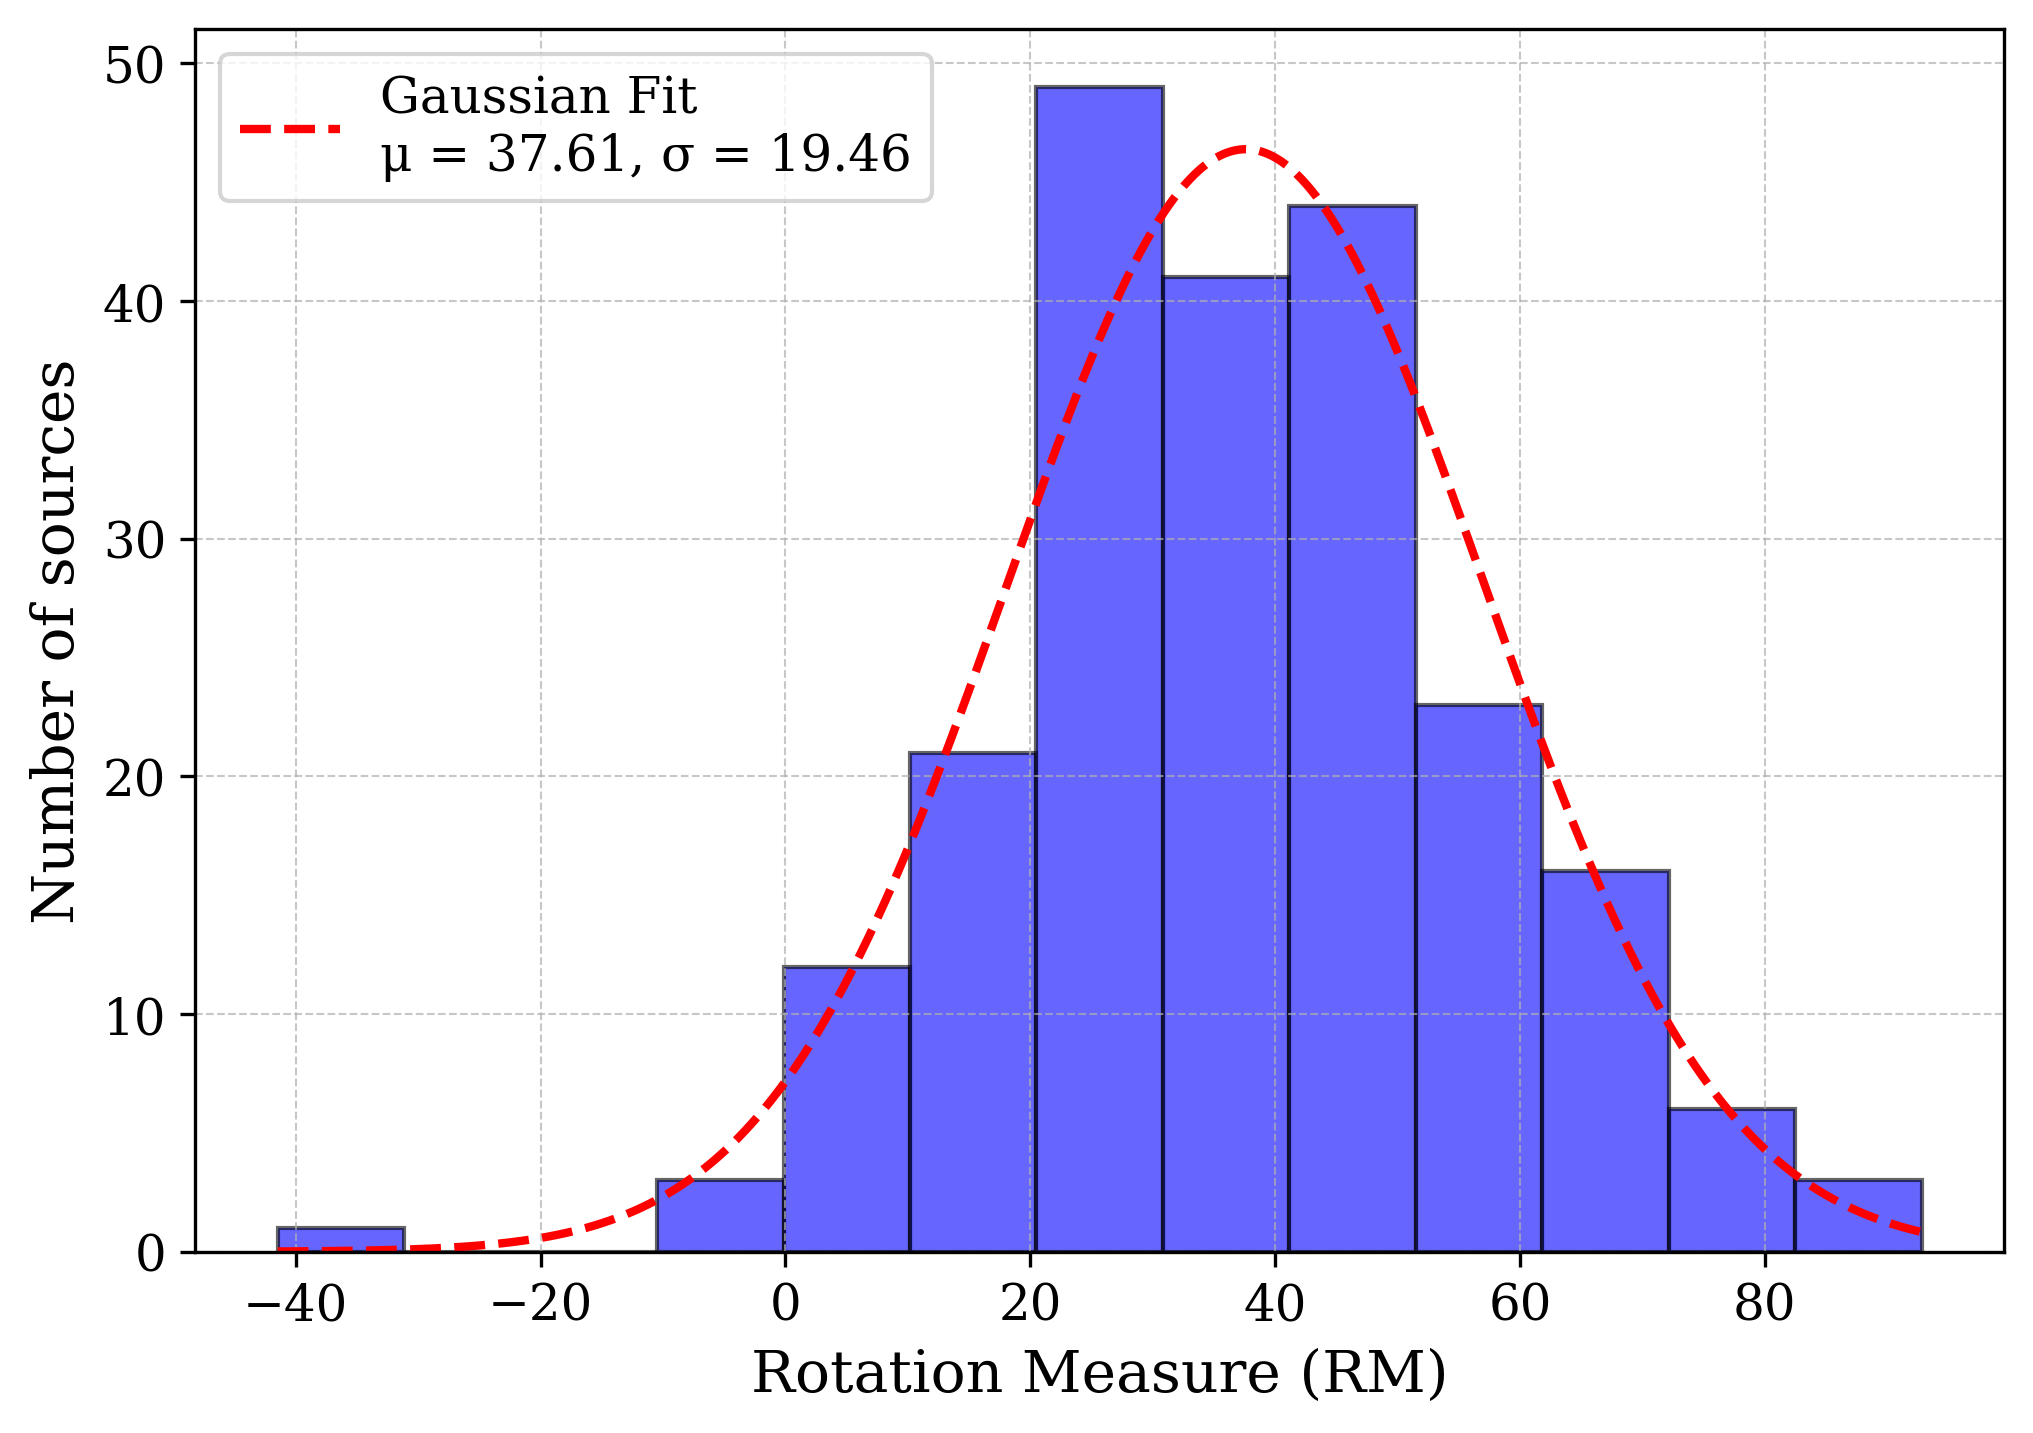

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Global plot style for consistency
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.usetex': False
})

# ============================================================
#  Read single file
# ============================================================
df = pd.read_csv('../paper2/total/true_detections_final.csv')
all_rm_values = df['RM'].dropna().tolist()

# Plot histogram with Gaussian fit
if all_rm_values:
    rm_array = np.array(all_rm_values)

    # Fit a Gaussian
    mu, std = norm.fit(rm_array)

    fig, ax = plt.subplots(figsize=(7, 5))

    # Plot histogram (COUNTS, not density)
    n, bins, _ = ax.hist(
        rm_array,
        bins=13,
        density=False,
        color='blue',
        edgecolor='black',
        alpha=0.6
    )

    # Gaussian fit line scaled to counts
    bin_width = bins[1] - bins[0]
    x = np.linspace(bins[0], bins[-1], 1000)
    p = norm.pdf(x, mu, std) * len(rm_array) * bin_width
    ax.plot(
        x, p, 'r--', linewidth=2,
        label=f'Gaussian Fit\nμ = {mu:.2f}, σ = {std:.2f}'
    )

    ax.set_xlabel('Rotation Measure (RM)')
    ax.set_ylabel('Number of sources')
    # ax.set_title('Distribution of Rotation Measures')
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.legend()

    plt.tight_layout()

    # Save plot
    output_path = '../paper1/figs/RM-histogram.pdf'
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.savefig(output_path, bbox_inches='tight')
    print(f"Plot saved to {output_path}")

    plt.show()
else:
    print("No RM values found to plot.")


Total sources: 219
Valid fracPol values: 219


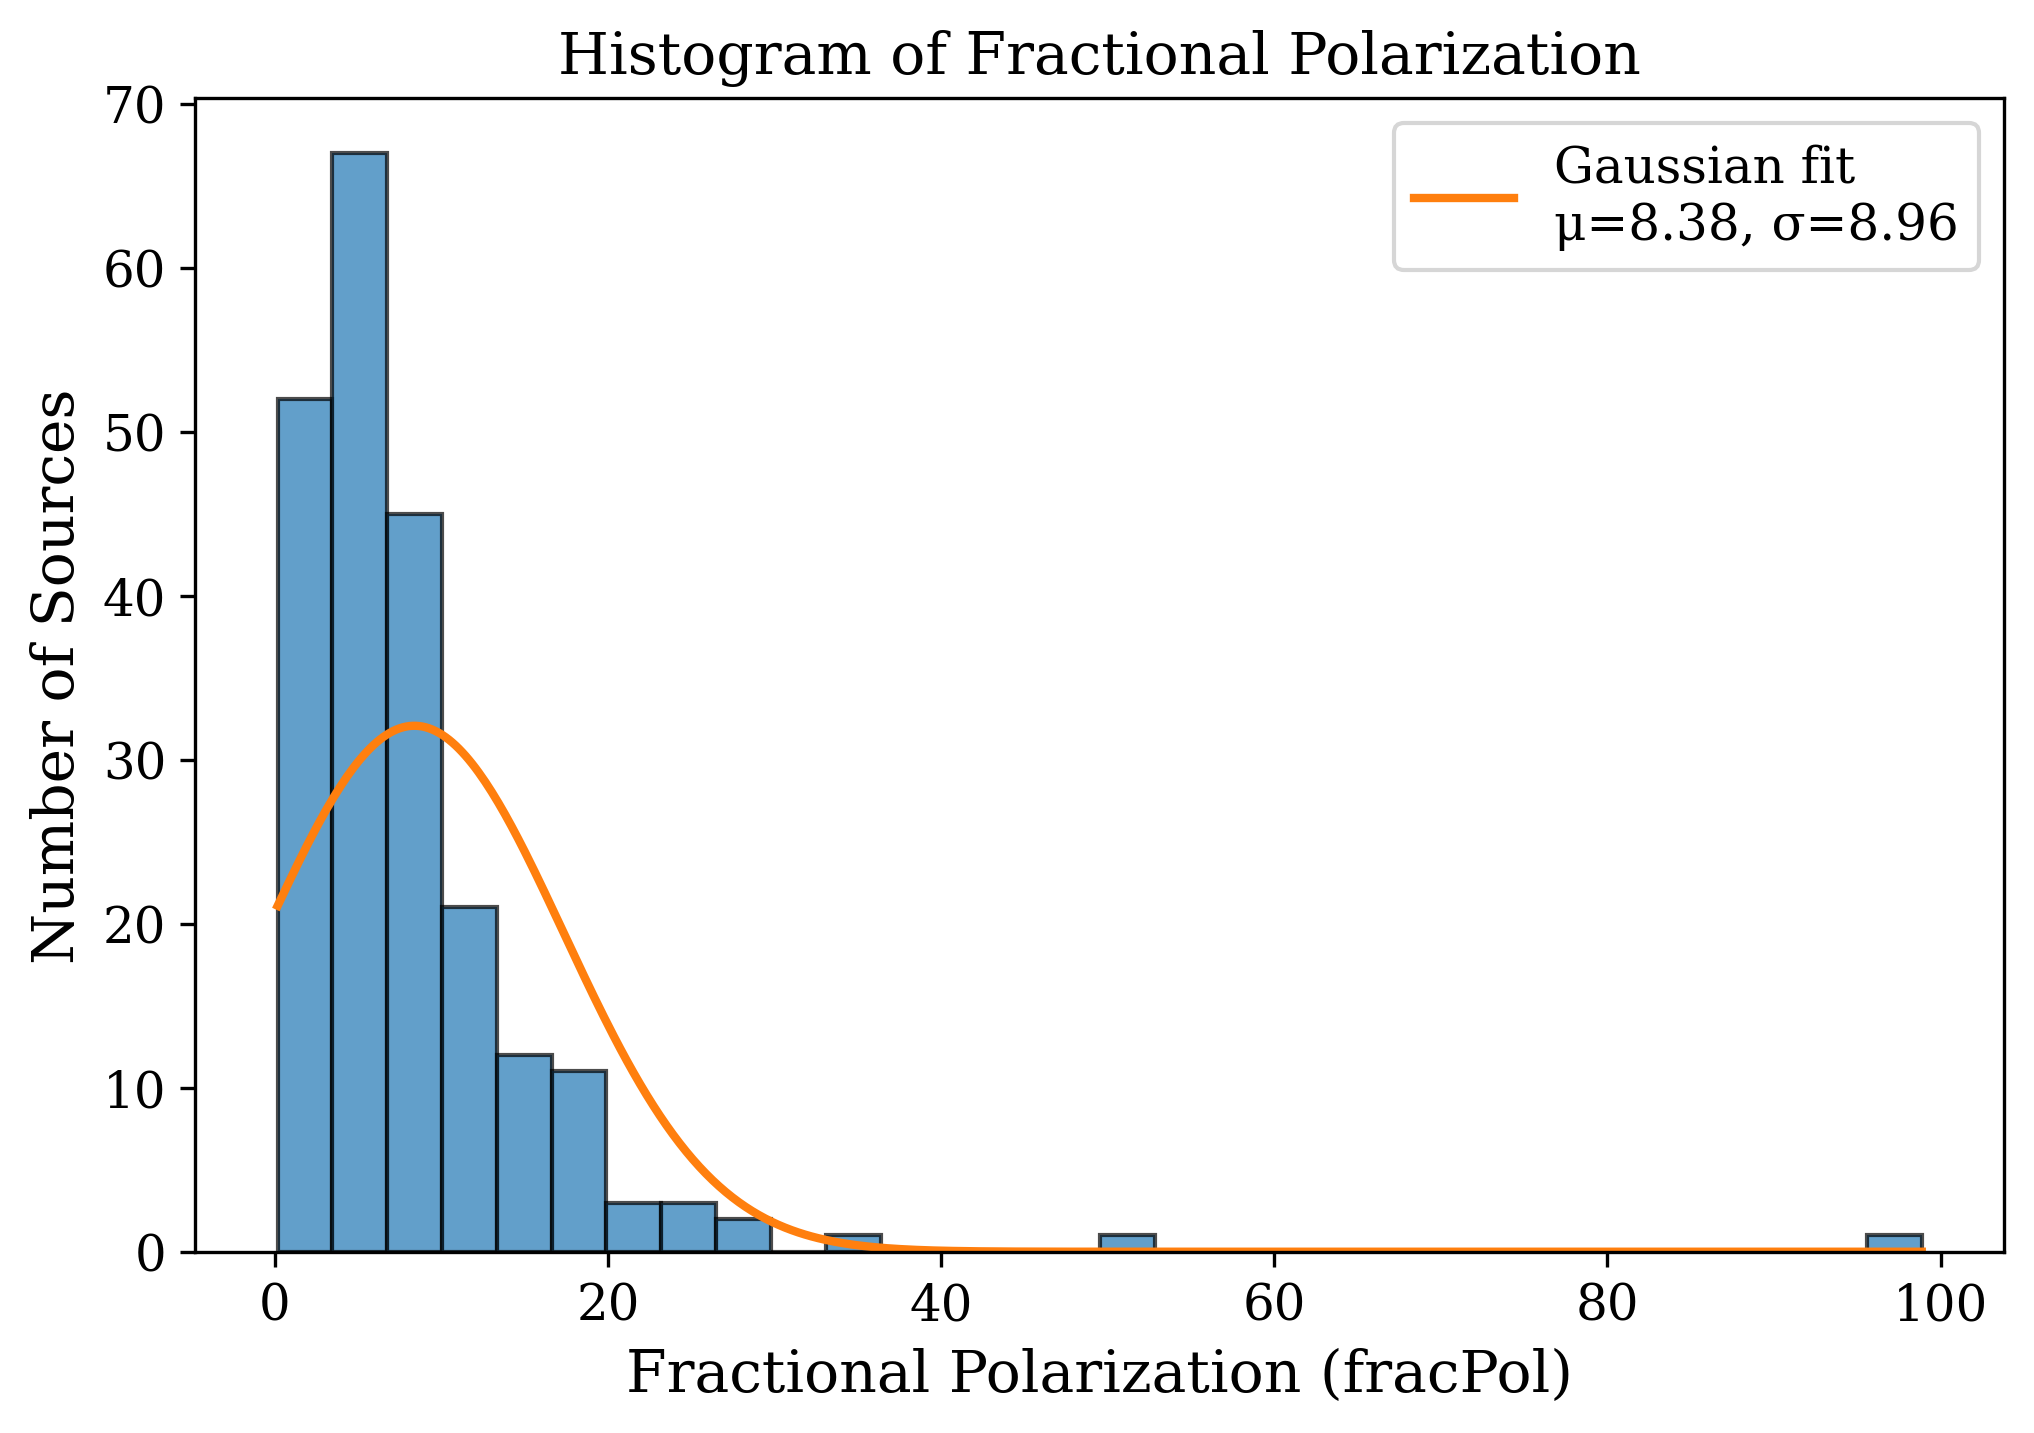

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ======================================
#  Global plot style (match your RM plots)
# ======================================
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.usetex': False
})

# ======================================
#  Load CSV
# ======================================
csv_path = '../paper2/total/true_detections_final.csv'
df = pd.read_csv(csv_path)

# Ensure correct column name
possible_cols = ['fracPol', 'fracpol', 'frac_pol', 'Fractional_Polarization']
frac_col = None
for c in possible_cols:
    if c in df.columns:
        frac_col = c
        break

if frac_col is None:
    raise ValueError("❌ Could not find fractional polarization column in CSV.")

# ======================================
#  Extract and clean fractional polarization
# ======================================
fracpol = df[frac_col].astype(float)
fracpol = fracpol.replace([np.inf, -np.inf], np.nan).dropna()

print(f"Total sources: {len(df)}")
print(f"Valid fracPol values: {len(fracpol)}")

# ======================================
#  Gaussian fit
# ======================================
mu, std = norm.fit(fracpol)

# ======================================
#  Plot histogram
# ======================================
fig, ax = plt.subplots(figsize=(7, 5))

counts, bins, _ = ax.hist(
    fracpol,
    bins=30,
    alpha=0.7,
    density=False,
    edgecolor='black'
)

# Gaussian curve
x = np.linspace(bins[0], bins[-1], 500)
p = norm.pdf(x, mu, std) * len(fracpol) * (bins[1] - bins[0])
ax.plot(x, p, linewidth=2, label=f"Gaussian fit\nμ={mu:.2f}, σ={std:.2f}")

ax.set_xlabel("Fractional Polarization (fracPol)")
ax.set_ylabel("Number of Sources")
ax.set_title("Histogram of Fractional Polarization")
ax.legend()

plt.tight_layout()
plt.show()
